In [2]:
import xarray as xr
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import sys
import matplotlib
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
#import cmocean
import glob
import os
import pandas as pd


In [3]:

# Define the directories
ssdflux_folder = "/Volumes/Thalassa/CMIP6_forcings_RG_360/SSDflux_output"
curl_folder = "/Volumes/Thalassa/CMIP6_forcings_RG_360/curl_output"
shdr_folder = "/Volumes/Thalassa/CMIP6_SHDR_RG_360"
wsm_folder="/Volumes/Thalassa/CMIP6_forcings_RG_360/wsm_output"

# Extract file lists
ssdflux_files = os.listdir(ssdflux_folder)
curl_files = os.listdir(curl_folder)
shdr_files = os.listdir(shdr_folder)

# Extract model names from the file prefixes
ssdflux_models = {file.split("_atm_forcing")[0] for file in ssdflux_files if file.endswith(".nc")}
curl_models = {file.split("_atm_forcing")[0] for file in curl_files if file.endswith(".nc")}
shdr_models = {file.split("_SHDR")[0] for file in shdr_files if file.endswith(".nc")}

# Find common models across all three folders
common_models = ssdflux_models.intersection(curl_models, shdr_models)

# Select files belonging to common models
ssdflux_selected = [file for file in ssdflux_files if file.split("_atm_forcing")[0] in common_models]
curl_selected = [file for file in curl_files if file.split("_atm_forcing")[0] in common_models]
shdr_selected = [file for file in shdr_files if file.split("_SHDR")[0] in common_models]

# Print the results
#print("Files in SSDflux folder belonging to common models:")
#print(ssdflux_selected)
#print("\nFiles in curl folder belonging to common models:")
#print(curl_selected)
#print("\nFiles in SHDR folder belonging to common models:")
#print(shdr_selected)

model_list = {file.split("_SHDR")[0] for file in shdr_selected if file.endswith(".nc")}
model_list=model_list


In [4]:

cmip6_ssdflux_path = "/Volumes/Thalassa/CMIP6_forcings_RG_360/SSDflux_output/"
cmip6_curl_path = "/Volumes/Thalassa/CMIP6_forcings_RG_360/curl_output/"
cmip6_shdr_path = "/Volumes/Thalassa/CMIP6_SHDR_RG_360/"
cmip6_wsm_path="/Volumes/Thalassa/CMIP6_forcings_RG_360/wsm_output"

obs_ssdflux_path="/Volumes/Thalassa/ERA5_data/SSDflux_rg/"
obs_curl_path="/Volumes/Thalassa/ORAS5/ORAS5_wind_stress_curl_rg/"
obs_shdr_path="/Volumes/Thalassa/CORA_SHDR_rg/"

obs_shdr=xr.open_mfdataset(sorted(glob.glob(obs_shdr_path+'*.nc')))
obs_curl=xr.open_mfdataset(sorted(glob.glob(obs_curl_path+'*.nc')))
obs_ssdflux=xr.open_dataset(obs_ssdflux_path+'SSDflux_ERA5_ORAS5.nc')



In [5]:
all_models_shdr=[]
all_models_ssdflux=[]
all_models_curl=[]
all_models_wsm=[]

model_list_dim=[]

for model in model_list:
    shdr_file = os.path.join(cmip6_shdr_path, f"{model}_SHDR.nc")
    with xr.open_dataset(shdr_file) as shdr:
        shdr_clim = shdr.groupby('time.month').mean()
        all_models_shdr.append(shdr_clim)  # No normalization inside the loop

    # Load Curl
    curl_file = os.path.join(cmip6_curl_path, f"{model}_atm_forcing_curl.nc")
    with xr.open_dataset(curl_file) as curl:
        curl_clim = curl.groupby('time.month').mean()
        all_models_curl.append(curl_clim)

    # Load SSDflux
    ssdflux_file = os.path.join(cmip6_ssdflux_path, f"{model}_atm_forcing_SSDflux.nc")
    with xr.open_dataset(ssdflux_file) as ssdflux:
        ssdflux_clim = ssdflux.groupby('time.month').mean()
        all_models_ssdflux.append(ssdflux_clim)
        
    
    # Load wsm
    wsm_file = os.path.join(cmip6_wsm_path, f"{model}_atm_forcing_wsm.nc")
    with xr.open_dataset(wsm_file) as wsm:
        wsm_clim = wsm.groupby('time.month').mean()
        all_models_wsm.append(wsm_clim)
    print(model)    
    model_list_dim.append(model)

# Compute Ensemble Mean FIRST
cmip6_shdr_ens_all = xr.concat(all_models_shdr, dim='model')#.mean(dim='model')
cmip6_curl_ens_all = xr.concat(all_models_curl, dim='model')#.mean(dim='model')
cmip6_ssdflux_ens_all = xr.concat(all_models_ssdflux, dim='model')#.mean(dim='model')
cmip6_wsm_ens_all = xr.concat(all_models_wsm, dim='model')#.mean(dim='model')

E3SM-1-0
NorESM2-LM
CMCC-CM2
MIROC6
IPSL-CM6A-LR
NESM3
FGOALS-f3-L
EC-Earth3-Veg
SAM0-UNICON
MPI-ESM2
EC-Earth3
BCC-CSM2-MR
ACCESS-CM2
CESM2
GFDL-ESM4
E3SM-1-1-ECA
BCC-ESM1
UKESM1-1
MRI-ESM2
CanESM5
GISS-E2
FIO-ESM2


In [6]:
model_list_dim

['E3SM-1-0',
 'NorESM2-LM',
 'CMCC-CM2',
 'MIROC6',
 'IPSL-CM6A-LR',
 'NESM3',
 'FGOALS-f3-L',
 'EC-Earth3-Veg',
 'SAM0-UNICON',
 'MPI-ESM2',
 'EC-Earth3',
 'BCC-CSM2-MR',
 'ACCESS-CM2',
 'CESM2',
 'GFDL-ESM4',
 'E3SM-1-1-ECA',
 'BCC-ESM1',
 'UKESM1-1',
 'MRI-ESM2',
 'CanESM5',
 'GISS-E2',
 'FIO-ESM2']

In [7]:
cmip6_wsm_ens_all=cmip6_wsm_ens_all.assign_coords(model=("model", model_list_dim))
cmip6_shdr_ens_all=cmip6_shdr_ens_all.assign_coords(model=("model", model_list_dim))
cmip6_curl_ens_all=cmip6_curl_ens_all.assign_coords(model=("model", model_list_dim))
cmip6_ssdflux_ens_all=cmip6_ssdflux_ens_all.assign_coords(model=("model", model_list_dim))

In [8]:
cmip6_shdr_ens_all.to_netcdf("/Volumes/Thalassa/cmip6_clim_ens/shdr.nc")
cmip6_curl_ens_all.to_netcdf("/Volumes/Thalassa/cmip6_clim_ens/curl.nc")
cmip6_ssdflux_ens_all.to_netcdf("/Volumes/Thalassa/cmip6_clim_ens/ssdflux.nc")
cmip6_wsm_ens_all.to_netcdf("/Volumes/Thalassa/cmip6_clim_ens/wsm.nc")

In [9]:
cmip6_shdr_ens = xr.concat(all_models_shdr, dim='model').median(dim='model')
cmip6_curl_ens = xr.concat(all_models_curl, dim='model').median(dim='model')
cmip6_ssdflux_ens = xr.concat(all_models_ssdflux, dim='model').median(dim='model')

# Standardize AFTER Computing the Ensemble Mean
cmip6_shdr_ens_std = (cmip6_shdr_ens - cmip6_shdr_ens.mean(dim='month')) / cmip6_shdr_ens.std(dim='month')
cmip6_curl_ens_std = (cmip6_curl_ens - cmip6_curl_ens.mean(dim='month')) / cmip6_curl_ens.std(dim='month')
cmip6_ssdflux_ens_std = (cmip6_ssdflux_ens - cmip6_ssdflux_ens.mean(dim='month')) / cmip6_ssdflux_ens.std(dim='month')

In [10]:

# --- Compute Climatology (Monthly Means) ---
obs_shdr_clim = obs_shdr.groupby('time.month').mean(dim='time')
obs_curl_clim = obs_curl.groupby('time_counter.month').mean(dim='time_counter')
obs_ssdflux_clim = obs_ssdflux.groupby('time.month').mean(dim='time')

# --- Standardize Using Climatology ---
obs_shdr_std = (obs_shdr_clim - obs_shdr_clim.mean(dim='month')) / obs_shdr_clim.std(dim='month')
obs_curl_std = (obs_curl_clim - obs_curl_clim.mean(dim='month')) / obs_curl_clim.std(dim='month')
obs_ssdflux_std = (obs_ssdflux_clim - obs_ssdflux_clim.mean(dim='month')) / obs_ssdflux_clim.std(dim='month')


In [11]:
#EPACIFIC
#lat_region=[-5,5]
#lon_region=[200, 260]

#NEA
#lat_region=[40,60]
#lon_region=[340,360]

#NEEA
#lat_region=[50,70]
#lon_region=[340,360]

#NA
lat_region=[40,60]
lon_region=[320,340]


#SIO
#lat_region=[-30,-10]
#lon_region=[58,96]


#cmip6_ssdflux_ens_std, obs_ssdflux_std = xr.align(cmip6_ssdflux_ens_std, obs_ssdflux_std)

vars = ['a1','D1','b3','curl','Ft','Fs','Frho']

bias_matrix = pd.DataFrame(index=np.arange(1, 13), columns=vars)  # 12 months × variables

for n in vars:
    if n == 'curl':
        cmip_mean = cmip6_curl_ens[n].sel(
            lon=slice(lon_region[0], lon_region[1]), 
            lat=slice(lat_region[0], lat_region[1])
        )#.mean(('lat', 'lon'))
        obs_mean = obs_curl_clim[n].sel(
            lon=slice(lon_region[0], lon_region[1]), 
            lat=slice(lat_region[0], lat_region[1])
        )#.mean(('lat', 'lon'))
        

    elif n in ['Ft', 'Fs', 'Frho']:
        cmip_mean = cmip6_ssdflux_ens[n].sel(
            lon=slice(lon_region[0], lon_region[1]), 
            lat=slice(lat_region[0], lat_region[1])
        )#.mean(('lat', 'lon'))
        obs_mean = obs_ssdflux_clim[n].sel(
            lon=slice(lon_region[0], lon_region[1]), 
            lat=slice(lat_region[0], lat_region[1])
        )#.mean(('lat', 'lon'))
        print(n)

    elif n in ['a1','D1', 'b3']:
        cmip_mean = cmip6_shdr_ens.sel(param=n).shdr.sel(
            lon=slice(lon_region[0], lon_region[1]), 
            lat=slice(lat_region[0], lat_region[1])
        )#.mean(('lat', 'lon'))
        obs_mean = obs_shdr_clim.sel(param=n).shdr.sel(
            lon=slice(lon_region[0], lon_region[1]), 
            lat=slice(lat_region[0], lat_region[1])
        )#.mean(('lat', 'lon'))

    # Compute bias for each month and store in the DataFrame
    for m in np.arange(1, 13, 1):
        cmip_mean_m = cmip_mean.sel(month=m)
        obs_mean_m = obs_mean.sel(month=m)
        bias = (100*(cmip_mean_m - obs_mean_m).sum(('lat','lon'))/obs_mean_m.sum(('lat','lon'))).values  # Convert to NumPy scalar

        # Store bias value in the DataFrame
        bias_matrix.loc[m, n] = bias

# Convert columns to numeric (for easier plotting)
bias_matrix = bias_matrix.astype(float)

        



Ft
Fs
Frho


In [12]:
obs_mean_m 

<xarray.DataArray 'Frho' (lat: 20, lon: 20)>
array([[1.26596023e-05, 1.15094204e-05, 1.05141321e-05, 9.76425546e-06,
        8.67713202e-06, 8.40427848e-06, 7.69054241e-06, 7.67768188e-06,
        7.77177875e-06, 7.37011848e-06, 7.41351281e-06, 7.24981894e-06,
        7.11729339e-06, 6.81884143e-06, 7.85058543e-06, 7.08615615e-06,
        7.37853727e-06, 7.48665696e-06, 7.05606214e-06, 6.62449622e-06],
       [1.23448387e-05, 1.14200247e-05, 1.13184430e-05, 1.03347146e-05,
        8.90282830e-06, 8.08134782e-06, 7.57953358e-06, 7.56034864e-06,
        7.29607212e-06, 6.85778683e-06, 7.29888060e-06, 7.49916368e-06,
        6.34773376e-06, 6.25764624e-06, 6.95546511e-06, 6.53353510e-06,
        6.55966795e-06, 7.37472862e-06, 6.49771526e-06, 6.55531506e-06],
       [1.37161969e-05, 1.28583680e-05, 1.19874898e-05, 1.00990179e-05,
        8.77078158e-06, 8.21446844e-06, 7.37822456e-06, 6.63191860e-06,
        7.13011522e-06, 6.64160222e-06, 6.84723851e-06, 6.52376187e-06,
        5.88669747e-06, 6.23507635e-06, 6.22639033e-06, 6.21430769e-06,
        6.49995826e-06, 6.64855784e-06, 6.51884198e-06, 6.48602274e-06],
       [1.56954455e-05, 1.31360512e-05, 1.27218530e-05, 1.11659874e-05,
        1.00853326e-05, 9.75843955e-06, 8.12065964e-06, 7.49263845e-06,
        7.56733332e-06, 7.09792595e-06, 7.57268870e-06, 6.91254304e-06,
        6.09754999e-06, 5.06979297e-06, 6.46667222e-06, 7.18278372e-06,
        6.65981923e-06, 6.28642470e-06, 6.54404362e-06, 6.46424842e-06],
...
       [8.48929708e-06, 9.32737583e-06, 9.06256466e-06, 8.82278092e-06,
        9.29312790e-06, 8.31282739e-06, 9.32558583e-06, 9.09305096e-06,
        8.83103845e-06, 8.34313585e-06, 7.46303912e-06, 6.92680524e-06,
        6.73996096e-06, 6.30273432e-06, 6.10237812e-06, 6.72554615e-06,
        8.01149651e-06, 9.55774697e-06, 1.01302690e-05, 9.23734055e-06],
       [7.98574303e-06, 7.88746224e-06, 7.53538486e-06, 7.79174533e-06,
        7.92558981e-06, 8.24706519e-06, 8.43803429e-06, 9.21678305e-06,
        8.84355619e-06, 8.26111258e-06, 7.88690649e-06, 7.21704462e-06,
        7.53507413e-06, 7.53508054e-06, 7.27117855e-06, 7.55863410e-06,
        8.02569122e-06, 7.17343905e-06, 8.82122583e-06, 9.78127371e-06],
       [7.20379232e-06, 7.62118064e-06, 8.15537479e-06, 7.77395123e-06,
        7.04736793e-06, 6.54995778e-06, 6.51320206e-06, 7.91204525e-06,
        8.67680659e-06, 8.09382059e-06, 7.97873754e-06, 7.68187727e-06,
        8.06972380e-06, 8.07135330e-06, 7.30184958e-06, 7.13962010e-06,
        8.27009978e-06, 7.64024216e-06, 7.47602609e-06, 9.03704315e-06],
       [7.22336129e-06, 7.41861059e-06, 7.25091669e-06, 7.30429299e-06,
        7.45064327e-06, 6.61838158e-06, 6.08183574e-06, 6.81643730e-06,
        7.87474397e-06, 7.27034092e-06, 7.81694731e-06, 7.49843614e-06,
        7.66936454e-06, 7.57682376e-06, 7.19259199e-06, 7.26702635e-06,
        7.32997268e-06, 7.54650109e-06, 8.24457635e-06, 8.57047234e-06]])
Coordinates:
    number   int64 0
  * lat      (lat) float64 40.5 41.5 42.5 43.5 44.5 ... 55.5 56.5 57.5 58.5 59.5
  * lon      (lon) float64 320.5 321.5 322.5 323.5 ... 336.5 337.5 338.5 339.5
    month    int64 12

In [13]:
vars = ['a1','D1','b3','curl','Ft','Fs','Frho']

bias_matrix_maps = []


for n in vars:
    if n == 'curl':
        cmip_mean = cmip6_curl_ens[n]
        obs_mean = obs_curl_clim[n]
        

    elif n in ['Ft', 'Fs', 'Frho']:
        cmip_mean = cmip6_ssdflux_ens[n]
        obs_mean = obs_ssdflux_clim[n]
        
        print(n)

    elif n in ['a1','D1', 'b3']:
        cmip_mean = cmip6_shdr_ens.sel(param=n)
        
        obs_mean = obs_shdr_clim.sel(param=n).shdr

    # Compute bias for each month and store in the DataFrame

    bias = 100*(cmip_mean - obs_mean)/obs_mean # Convert to NumPy scalar
    bias_matrix_maps.append(bias)

Ft
Fs
Frho


In [14]:
D_model_std=cmip6_shdr_ens_all.sel(param='D1').shdr.mean('month').std('model')#.plot(vmin=0,vmax=100)

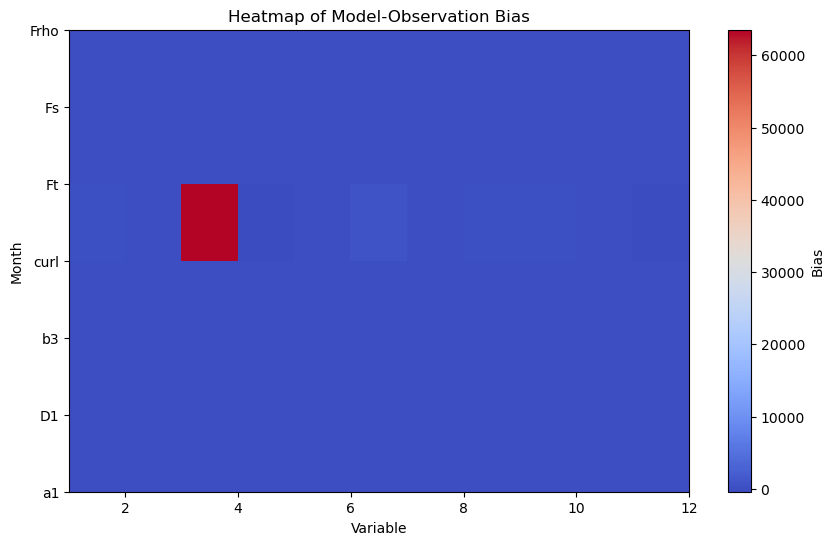

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))

# Create a heatmap using Matplotlib's pcolormesh
c = ax.pcolormesh(bias_matrix.index, bias_matrix.columns, bias_matrix.values.T, cmap="coolwarm", shading='auto')

# Add colorbar
fig.colorbar(c, ax=ax, label="Bias")

# Labels and title
ax.set_xlabel("Variable")
ax.set_ylabel("Month")
ax.set_title("Heatmap of Model-Observation Bias")

# Show the heatmap
plt.show()

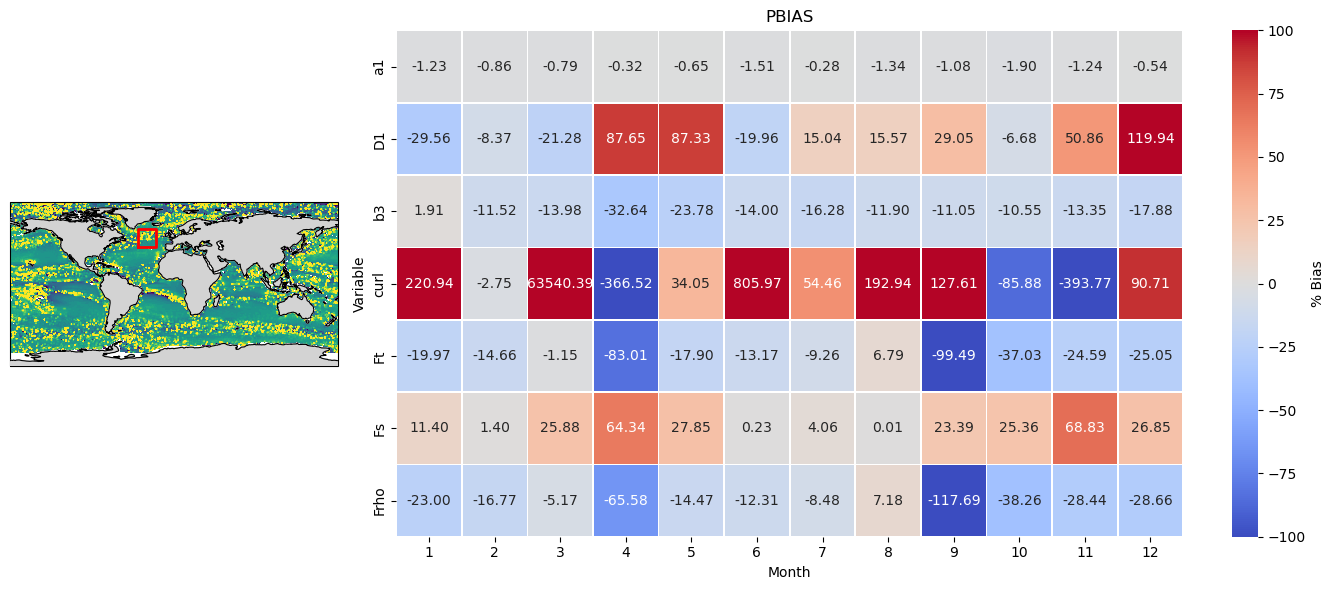

In [16]:
import matplotlib.gridspec as gridspec
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns

D_model_std=cmip6_shdr_ens_all.sel(param='D1').shdr.mean('month').std('model')

curl_bias=bias_matrix_maps[3].mean('month')


lat_min, lat_max = lat_region[0], lat_region[1]
lon_min, lon_max = lon_region[0], lon_region[1]


fig = plt.figure(figsize=(14, 6))
gs = gridspec.GridSpec(1, 2, width_ratios=[0.5, 1.5])


ax_map = fig.add_subplot(gs[0], projection=ccrs.PlateCarree())
ax_map.set_global()


ax_map.add_feature(cfeature.LAND, facecolor='lightgray',zorder=3)
ax_map.add_feature(cfeature.COASTLINE, linewidth=0.8,zorder=3)
#ax_map.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5)


ax_map.plot([lon_min, lon_max, lon_max, lon_min, lon_min],
            [lat_min, lat_min, lat_max, lat_max, lat_min],
            color='red', linewidth=2, transform=ccrs.PlateCarree(), zorder=4)

ax_map.contourf(D_model_std.lon,D_model_std.lat,curl_bias,levels=np.arange(-200,200,10), extend='both')


ax_map.set_title("")


ax_heatmap = fig.add_subplot(gs[1])


sns.heatmap(bias_matrix.T, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5, cbar_kws={'label': "% Bias"}, ax=ax_heatmap, vmin=-100, vmax=100)


ax_heatmap.set_xlabel("Month")
ax_heatmap.set_ylabel("Variable")
ax_heatmap.set_title("PBIAS")


plt.tight_layout()


plt.show()

#fig.savefig("/Users/ignasi/Desktop/Oceanography/IEO/projects/stratification_CMIP6/figures_AEC/PBIAS_NA.png",dpi=300)


In [17]:

vars = ['a1','D1','b3','curl','Ft','Fs','Frho']

bias_matrix_maps = []


for n in vars:
    if n == 'curl':
        cmip_mean = cmip6_curl_ens[n]
        obs_mean = obs_curl_clim[n]
        

    elif n in ['Ft', 'Fs', 'Frho']:
        cmip_mean = cmip6_ssdflux_ens[n]
        obs_mean = obs_ssdflux_clim[n]
        
        print(n)

    elif n in ['a1','D1', 'b3']:
        cmip_mean = cmip6_shdr_ens.sel(param=n)
        
        obs_mean = obs_shdr_clim.sel(param=n).shdr

    # Compute bias for each month and store in the DataFrame

    bias = 100*(cmip_mean - obs_mean)/obs_mean # Convert to NumPy scalar
    bias_matrix_maps.append(bias)

        # Store bias value in the DataFrame
        #bias_matrix.loc[m, n] = bias

# Convert columns to numeric (for easier plotting)
#bias_matrix = bias_matrix.astype(float)





Ft
Fs
Frho


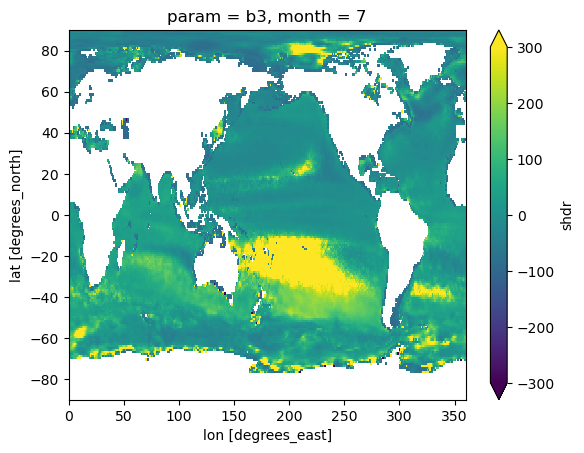

In [18]:
bias_matrix_maps[2].shdr.isel(month=6).plot(vmin=-300,vmax=300)

In [19]:
#Sorting BIAS

#STPACIFIC
#lat_region=[-40,-20]
#lon_region=[175, 225]

#SOPACIFICNEA
lat_region=[-60,-50]
lon_region=[200,275]


#cmip6_ssdflux_ens_std, obs_ssdflux_std = xr.align(cmip6_ssdflux_ens_std, obs_ssdflux_std)

vars_name = ['a1','D1','b3','curl','Ft','Fs','Frho']

season=[3,4,5]
#season=[8,9,10]
season=[1,2,3,4,5,6,7,8,9,10,11,12]

bias_matrix = pd.DataFrame(index=vars_name, columns=model_list)  # 12 months × variables

for m in range(len(cmip6_curl_ens_all.model)):
    model_m=list(model_list)[m]
    print(model_m)
    
    for n in vars_name:
        if n == 'curl':
            cmip_mean = cmip6_curl_ens_all.isel(model=m)[n].sel(
                lon=slice(lon_region[0], lon_region[1]), 
                lat=slice(lat_region[0], lat_region[1])
            ).mean(('lat', 'lon')).sel(month=season).mean('month')
            obs_mean = obs_curl_clim[n].sel(
                lon=slice(lon_region[0], lon_region[1]), 
                lat=slice(lat_region[0], lat_region[1])
            ).mean(('lat', 'lon')).sel(month=season).mean('month')


        elif n in ['Ft', 'Fs', 'Frho']:
            cmip_mean = cmip6_ssdflux_ens_all.isel(model=m)[n].sel(
                lon=slice(lon_region[0], lon_region[1]), 
                lat=slice(lat_region[0], lat_region[1])
            ).mean(('lat', 'lon')).sel(month=season).mean('month')
            obs_mean = obs_ssdflux_clim[n].sel(
                lon=slice(lon_region[0], lon_region[1]), 
                lat=slice(lat_region[0], lat_region[1])
            ).mean(('lat', 'lon')).sel(month=season).mean('month')
            

        elif n in ['a1','D1', 'b3']:
            cmip_mean = cmip6_shdr_ens_all.isel(model=m).sel(param=n).shdr.sel(
                lon=slice(lon_region[0], lon_region[1]), 
                lat=slice(lat_region[0], lat_region[1])
            ).mean(('lat', 'lon')).sel(month=season).mean('month')
            obs_mean = obs_shdr_clim.sel(param=n).shdr.sel(
                lon=slice(lon_region[0], lon_region[1]), 
                lat=slice(lat_region[0], lat_region[1])
            ).mean(('lat', 'lon')).sel(month=season).mean('month')

        # Compute bias for each month and store in the DataFrame
        #for m in np.arange(1, 13, 1):
        #cmip_mean_m = cmip_mean
        #obs_mean_m = obs_mean
        bias = (100*(cmip_mean - obs_mean)/obs_mean).values  # Convert to NumPy scalar

            # Store bias value in the DataFrame
        bias_matrix.loc[n, model_m] = bias
        

# Convert columns to numeric (for easier plotting)
#bias_matrix = bias_matrix.astype(float)


E3SM-1-0
NorESM2-LM
CMCC-CM2
MIROC6
IPSL-CM6A-LR
NESM3
FGOALS-f3-L
EC-Earth3-Veg
SAM0-UNICON
MPI-ESM2
EC-Earth3
BCC-CSM2-MR
ACCESS-CM2
CESM2
GFDL-ESM4
E3SM-1-1-ECA
BCC-ESM1
UKESM1-1
MRI-ESM2
CanESM5
GISS-E2
FIO-ESM2


In [270]:
bias_matrix

ds = xr.Dataset(
    {
        "bias_values": (["variable", "model"], bias_matrix.values)  # Store bias data
    },
    coords={
        "variable": bias_matrix.index,  # Variable names (rows)
        "model": bias_matrix.columns,   # Model names (columns)
    }
)

# Save to NetCDF file
ds.to_netcdf("/Users/ignasi/Desktop/Oceanography/IEO/projects/stratification_CMIP6/bias_modelens_SOPACIFIC.nc")

In [20]:
bias_STPACIFIC=xr.open_dataset("/Users/ignasi/Desktop/Oceanography/IEO/projects/stratification_CMIP6/bias_modelens_STPACIFIC.nc")

bias_SOPACIFIC=xr.open_dataset("/Users/ignasi/Desktop/Oceanography/IEO/projects/stratification_CMIP6/bias_modelens_SOPACIFIC.nc")

In [25]:
sorted_b3 = bias_STPACIFIC.sel(variable='b3').sortby('bias_values')

sorted_models = sorted_b3.model  

sorted_a1 = bias_STPACIFIC.sel(variable='a1').sel(model=sorted_models)

In [26]:
print(sorted_D1.bias_values)

NameError: name 'sorted_D1' is not defined

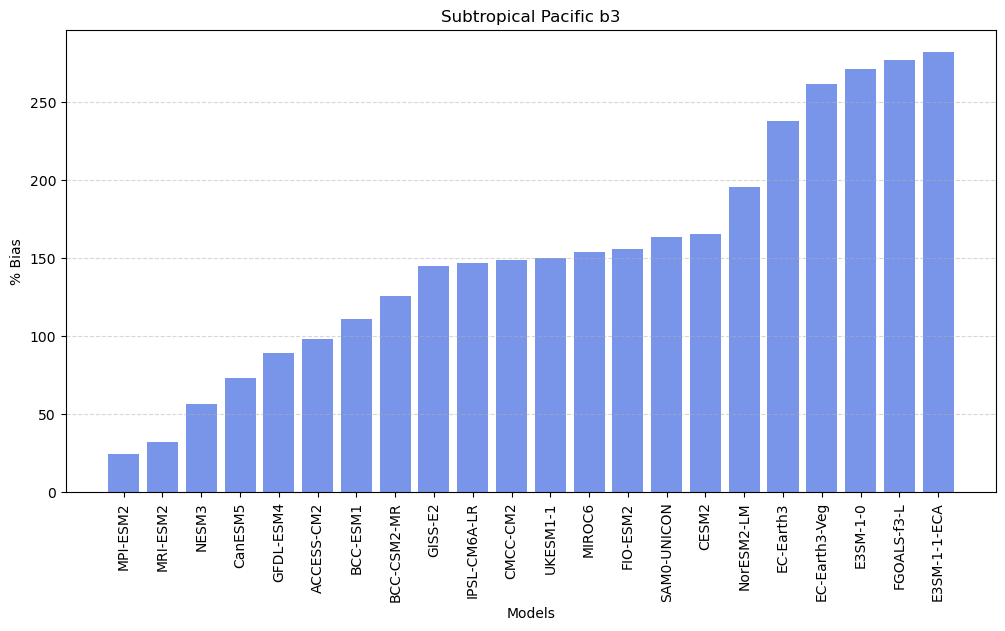

In [35]:
models = sorted_b3.bias_values.model.values  # Model names
b3_values = sorted_b3.bias_values.values  # Bias values
a1_values = sorted_a1.bias_values.values  # Bias values


plt.figure(figsize=(12, 6))
plt.bar(models, b3_values, color='royalblue', alpha=0.7)


plt.xticks(rotation=90)  # Rotate model names for readability
plt.xlabel("Models")
plt.ylabel("% Bias")
plt.title("Subtropical Pacific b3")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.savefig("/Users/ignasi/Desktop/Oceanography/IEO/projects/stratification_CMIP6/figures_AEC/b3_STPA_PBIAS.png",dpi=300)


# Show the plot
plt.show()

In [30]:
plt.savefig("/Users/ignasi/Desktop/Oceanography/IEO/projects/stratification_CMIP6/figures_AEC/b3_STPA_PBIAS.png",dpi=300)


<Figure size 640x480 with 0 Axes>

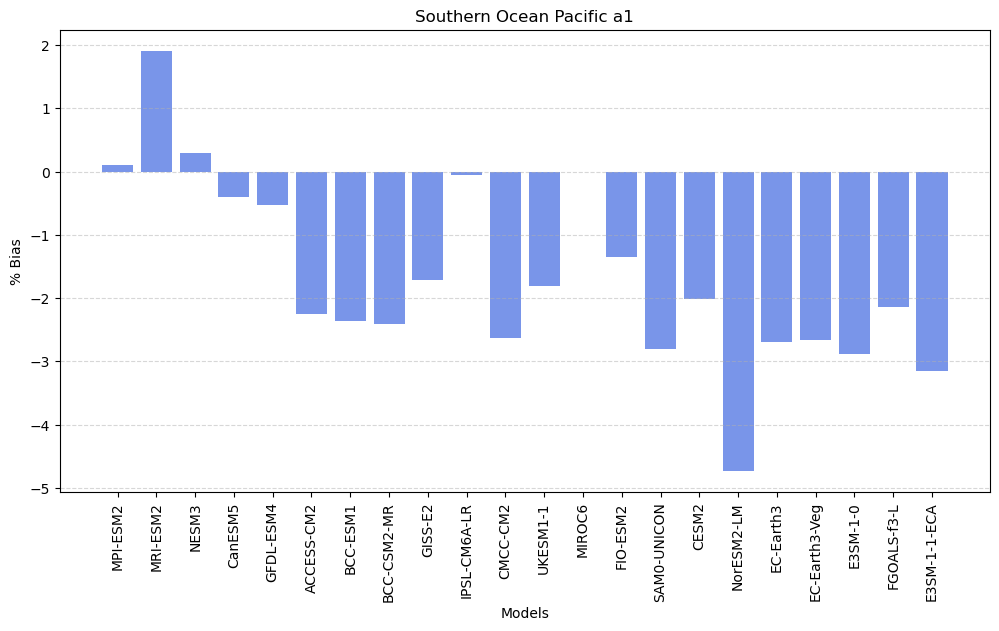

In [34]:

plt.figure(figsize=(12, 6))
plt.bar(models, a1_values, color='royalblue', alpha=0.7)


plt.xticks(rotation=90)  # Rotate model names for readability
plt.xlabel("Models")
plt.ylabel("% Bias")
plt.title("Southern Ocean Pacific a1")
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.savefig("/Users/ignasi/Desktop/Oceanography/IEO/projects/stratification_CMIP6/figures_AEC/a1_SOPA_PBIAS.png",dpi=300)


# Show the plot
plt.show()

In [33]:
plt.savefig("/Users/ignasi/Desktop/Oceanography/IEO/projects/stratification_CMIP6/figures_AEC/a1_SOPA_PBIAS.png",dpi=300)


<Figure size 640x480 with 0 Axes>

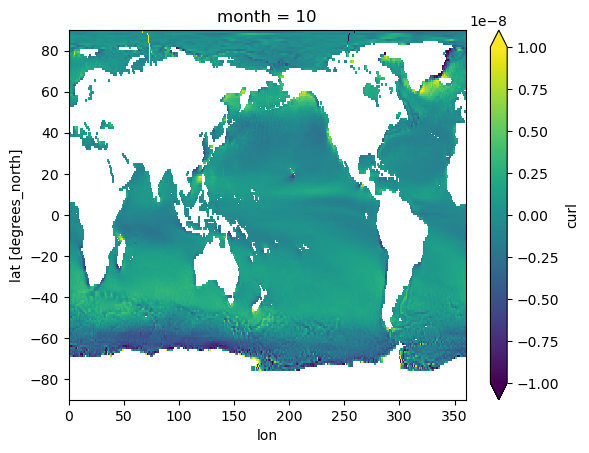

In [374]:
obs_curl_clim.curl.isel(month=9).plot(vmin=-1e-8,vmax=1e-8)

In [90]:
from sklearn.metrics import mean_squared_error

rmse_std = np.sqrt(mean_squared_error(cmip6_ssdflux_ens_std.values.flatten(), obs_ssdflux_std.values.flatten()))

NameError: name 'mean_squared_error' is not defined

In [48]:

ssdflux_folder = "/Volumes/Thalassa/CMIP6_forcings_RG_360/SSDflux_output"
shdr_folder = "/Volumes/Thalassa/CMIP6_SHDR_RG_360"

correlation_results = {}
season=[7,8,9]

for model in model_list:
    # Load SSDflux file (Frho variable)
    ssdflux_file = os.path.join(ssdflux_folder, f"{model}_atm_forcing_SSDflux.nc")
    ds_Frho = xr.open_dataset(ssdflux_file).sel(time=slice("1971-01-01", "2014-12-31"))
    
    # Load SHDR file (b3 variable)
    shdr_file = os.path.join(shdr_folder, f"{model}_SHDR.nc")
    ds_b3 = xr.open_dataset(shdr_file).sel(time=slice("1971-01-01", "2014-12-31"))
    
    # Ensure time values are consistent
    ds_Frho=ds_Frho.sel(time=ds_b3["time"].values)
    #ds_b3["time"] = ds_Frho["time"].values

    # Select winter months (December, January, February)
    ds_Frho_winter = ds_Frho.sel(time=ds_Frho["time.month"].isin(season))
    ds_b3_winter = ds_b3.sel(time=ds_b3["time.month"].isin(season))
    
    # Calculate correlation map (Pearson correlation for each grid point)
    def pearson_corr(x, y):
        return np.corrcoef(x, y)[0, 1]
    
    correlation_map = xr.apply_ufunc(
        pearson_corr,
        ds_Frho_winter['Frho'],
        ds_b3_winter.sel(param="b3"),
        input_core_dims=[["time"], ["time"]],
        vectorize=True,
        dask="parallelized",
        output_dtypes=[float]
    )
    
    # Store the result
    correlation_results[model] = correlation_map

    # Optionally, save the correlation map to a NetCDF file
    #output_file = f"{model}_winter_correlation.nc"
    #correlation_map.to_netcdf(output_file)
    print(f"Correlation map saved for {model} as {output_file}")


NameError: name 'output_file' is not defined

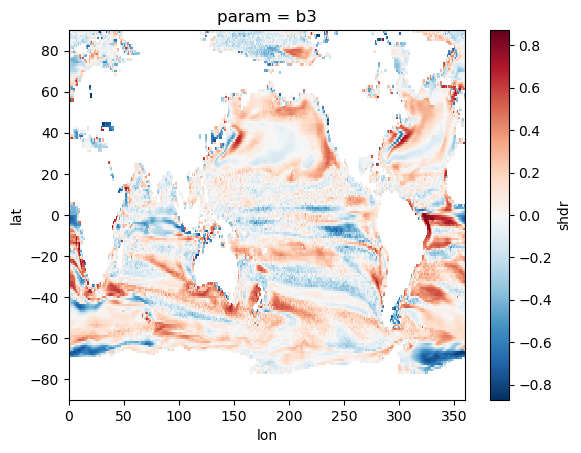

In [145]:
correlation_map.shdr.plot()

In [141]:
ssdflux_folder = "/Volumes/Thalassa/CMIP6_forcings_RG_360/curl_output"
shdr_folder = "/Volumes/Thalassa/CMIP6_SHDR_RG_360"

correlation_results = {}
season=[7,8,9]

for model in model_list:
    # Load SSDflux file (Frho variable)
    ssdflux_file = os.path.join(ssdflux_folder, f"{model}_atm_forcing_curl.nc")
    ds_Frho = xr.open_dataset(ssdflux_file).sel(time=slice("1971-01-01", "2014-12-31"))
    
    # Load SHDR file (b3 variable)
    shdr_file = os.path.join(shdr_folder, f"{model}_SHDR.nc")
    ds_b3 = xr.open_dataset(shdr_file).sel(time=slice("1971-01-01", "2014-12-31"))
    
    # Ensure time values are consistent
    ds_Frho=ds_Frho.sel(time=ds_b3["time"].values)
    #ds_b3["time"] = ds_Frho["time"].values

    # Select winter months (December, January, February)
    ds_Frho_winter = ds_Frho.sel(time=ds_Frho["time.month"].isin(season))
    ds_b3_winter = ds_b3.sel(time=ds_b3["time.month"].isin(season))
    
    # Calculate correlation map (Pearson correlation for each grid point)
    def pearson_corr(x, y):
        return np.corrcoef(x, y)[0, 1]
    
    correlation_map = xr.apply_ufunc(
        pearson_corr,
        ds_Frho_winter["curl"],
        ds_b3_winter.sel(param="a1"),
        input_core_dims=[["time"], ["time"]],
        vectorize=True,
        dask="parallelized",
        output_dtypes=[float]
    )
    
    # Store the result
    correlation_results[model] = correlation_map

    # Optionally, save the correlation map to a NetCDF file
    #output_file = f"{model}_winter_correlation.nc"
    #correlation_map.to_netcdf(output_file)
    print(f"Correlation map saved for {model} as {output_file}")



Correlation map saved for BCC-ESM1 as CanESM5_winter_correlation.nc


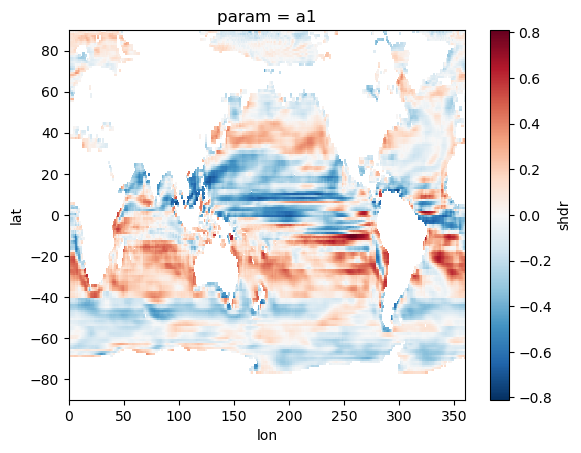

In [98]:
correlation_map.shdr.plot()

In [192]:
shdr_folder='/Volumes/Thalassa/CORA_SHDR_rg/'
ssdflux_folder='/Volumes/Thalassa/ORAS5/ORAS5_wind_stress_curl_rg/'
ssdflux_file =  xr.open_mfdataset(sorted(glob.glob(ssdflux_folder+'*.nc'))).sel(time_counter=slice("1971-01-01", "2014-12-31")).load()

ds_Frho =ssdflux_file
    
# Load SHDR file (b3 variable)
shdr_file = xr.open_mfdataset(sorted(glob.glob(shdr_folder+'*.nc'))).sel(time=slice("1971-01-01", "2014-12-31")).load()
ds_b3 = shdr_file
 

In [198]:
ds_Frho.time_counter


<xarray.DataArray 'time_counter' (time_counter: 528)>
array(['1971-01-16T00:00:00.000000000', '1971-02-15T00:00:00.000000000',
       '1971-03-16T00:00:00.000000000', ..., '2014-10-16T00:00:00.000000000',
       '2014-11-16T00:00:00.000000000', '2014-12-16T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 1971-01-16 ... 2014-12-16
Attributes:
    standard_name:  time

In [199]:
   
# Ensure time values are consistent
ds_Frho['time_counter']=ds_b3["time"].values
ds_Frho=ds_Frho.rename({'time_counter':'time'})
    #ds_b3["time"] = ds_Frho["time"].values

In [209]:
season=[12,1,2]
# Select winter months (December, January, February)
ds_Frho_winter = ds_Frho.sel(time=ds_Frho["time.month"].isin(season))
ds_b3_winter = ds_b3.sel(time=ds_b3["time.month"].isin(season))
    
    # Calculate correlation map (Pearson correlation for each grid point)
def pearson_corr(x, y):
    return np.corrcoef(x, y)[0, 1]
 

In [218]:
   
correlation_map = xr.apply_ufunc(
    pearson_corr,
    ds_Frho_winter['curl'],
    ds_b3_winter.sel(param="b3"),
    input_core_dims=[["time"], ["time"]],
    vectorize=True,
    dask="parallelized",
    output_dtypes=[float])
    
    

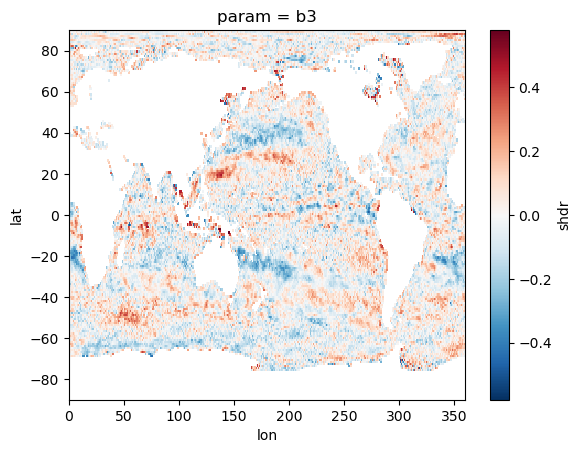

In [219]:
correlation_map.shdr.plot()